# Read in Data

In [ ]:
from google.colab import drive
import pandas as pd


In [ ]:
#uncomment to get from https://github.com/fatehss/Tesla-Price-Prediction/tree/main/data
data_path= "https://raw.githubusercontent.com/fatehss/Tesla-Price-Prediction/main/data/FullData.csv?token=GHSAT0AAAAAACCKCPYQM4BXGUFT545YVPAOZECS34Q" # <- data.csv
news_data_path = "https://raw.githubusercontent.com/fatehss/Tesla-Price-Prediction/main/data/news.csv?token=GHSAT0AAAAAACCKCPYQ3BMUJOZL3K355MYGZECS4FA" # <- news.csv

#for local files:
#data_path = "/content/FullData.csv"
#news_data_path = "/content/news.csv"

df = pd.read_csv('/content/FullData.csv')
sentiment = pd.read_csv('/content/news.csv')

df.head()

,Week,Car Index Change,VIX change,Google Trends,S&P,Tesla (Y_I),Raw Stock
0,1/10/2020 16:00:00,-0.031347,-0.104137,29,3265.35,1,31.88
1,1/17/2020 16:00:00,0.006947,-0.036624,30,3329.62,1,34.03
2,1/24/2020 16:00:00,-0.039206,0.203306,34,3295.47,1,37.65
3,1/31/2020 16:00:00,-0.056743,0.293956,53,3225.52,1,43.37
4,2/7/2020 16:00:00,-0.015782,-0.178875,34,3327.71,1,49.87


In [ ]:
df['sentiment'] = sentiment['sentiment']
df  = df.drop('Tesla (Y_I)', axis=1)
df = df.interpolate()  # Fill missing values using linear interpolation
df['Week'] = pd.to_datetime(df['Week'])
df = df.set_index('Week')

In [ ]:
sentiment

,week,sentiment
0,2020-01-06/2020-01-12,-0.133967
1,2020-01-13/2020-01-19,0.000000
2,2020-01-20/2020-01-26,0.093630
3,2020-01-27/2020-02-02,0.028143
4,2020-02-03/2020-02-09,0.050129
...,...,...
171,2023-04-24/2023-04-30,-0.101150
172,2023-05-01/2023-05-07,-0.074980
173,2023-05-08/2023-05-14,-0.057190
174,2023-05-15/2023-05-21,-0.101133


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**K Means Model**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2
15491754.570642963


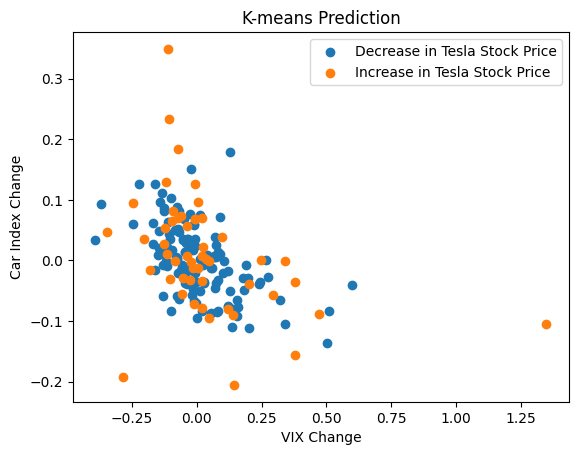

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/CS145 Tesla Project/FullData.csv")
df  = df.drop('Tesla (Y_I)', axis=1)
df=df.drop('Week',axis=1)
km = KMeans(n_clusters=2,random_state=42)
X=df.values
km.fit(X)
label=km.labels_

label_dict = {0: 'Decrease in Tesla Stock Price', 1: 'Increase in Tesla Stock Price'}
u_labels = np.unique(label)
inert=km.inertia_
#plotting the results:
print(len(u_labels))
for i in u_labels:
    plt.scatter(X[label==i, 1] , X[label==i, 0] , label = label_dict.get(i))
print(inert)
plt.xlabel("VIX Change")
plt.ylabel("Car Index Change")
plt.title("K-means Prediction")
plt.legend()



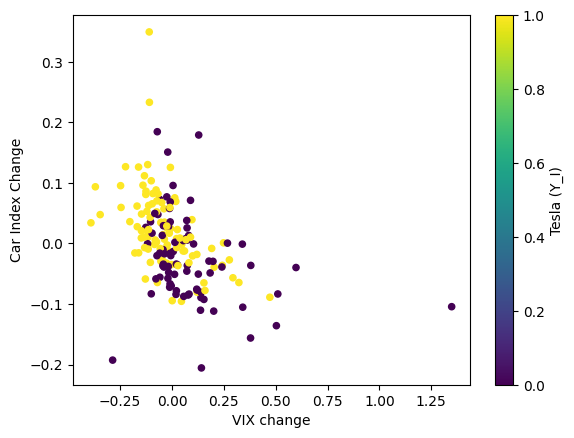

In [ ]:
 df=pd.read_csv("/content/FullData.csv")
 ax2 = df.plot.scatter(x='VIX change',
                      y='Car Index Change',
                       c='Tesla (Y_I)',
                      colormap='viridis')


# Random Forest

Best number of estimators: 25 with MSE = 1310.8931462275555


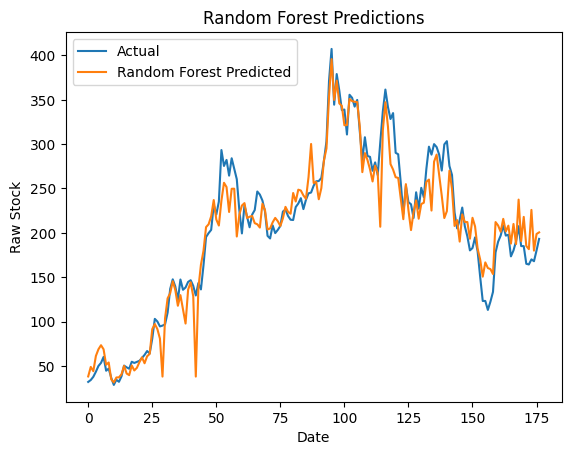

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random


# Define the features and target variables
features = df[['Car Index Change', 'VIX change', 'Google Trends', 'S&P']]
target = df['Raw Stock']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

mean_squared_errors = []
best_mse = [0, 100000000] #stores best number of estimators

for i in range(1,100): #test 5 different random states
  mse = 0
  for j in range(5):
    # Fit a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=i, random_state=random.randint(0,100))
    rf_model.fit(X_train, y_train)

    # Generate predictions
    predictions = rf_model.predict(X_test)

    # Calculate the mean squared error
    mse += mean_squared_error(y_test, predictions)

  mse /=5 #get average mse
  if mse < best_mse[1]:
    best_mse = [i, mse]
  #print(f"Mean Squared Error: {mse}" + ", i=" + str(i))
  mean_squared_errors.append(mse)


print(f"Best number of estimators: {best_mse[0]} with MSE = {best_mse[1]}")
# Generate predictions for the entire dataset
rf_model = RandomForestRegressor(n_estimators=best_mse[0], random_state=random.randint(0,100))
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(features)
# print(features)


# Plot actual vs predicted
plt.plot(df.index, target, label='Actual')
plt.plot(df.index, rf_predictions, label='Random Forest Predicted')
plt.xlabel('Date')
plt.ylabel('Raw Stock')
plt.legend()
plt.title('Random Forest Predictions')
plt.show()



# XG Boost

Mean Squared Error: 1452.1910361429466


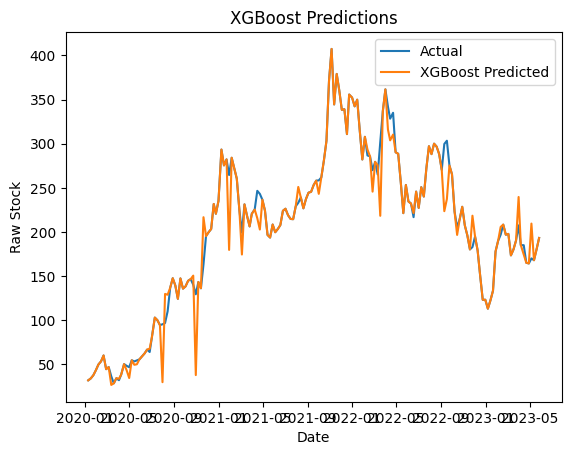

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the features and target variables
features = df[['Car Index Change', 'VIX change', 'Google Trends', 'S&P']]
target = df['Raw Stock']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Fit an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Generate predictions for the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate the mean squared error for the test set
mse = mean_squared_error(y_test, xgb_predictions)
print(f"Mean Squared Error: {mse}")

# Generate predictions for the entire dataset
xgb_predictions_full = xgb_model.predict(features)

# Plot the actual vs predicted values
plt.plot(df.index, target, label='Actual')
plt.plot(df.index, xgb_predictions_full, label='XGBoost Predicted')
plt.xlabel('Date')
plt.ylabel('Raw Stock')
plt.legend()
plt.title('XGBoost Predictions')
plt.show()


# Prophet Model

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9gaxhdf5/37oa1f20.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9gaxhdf5/bxtt_x0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44197', 'data', 'file=/tmp/tmp9gaxhdf5/37oa1f20.json', 'init=/tmp/tmp9gaxhdf5/bxtt_x0i.json', 'output', 'file=/tmp/tmp9gaxhdf5/prophet_modelv8m342x2/prophet_model-20230613064202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:42:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


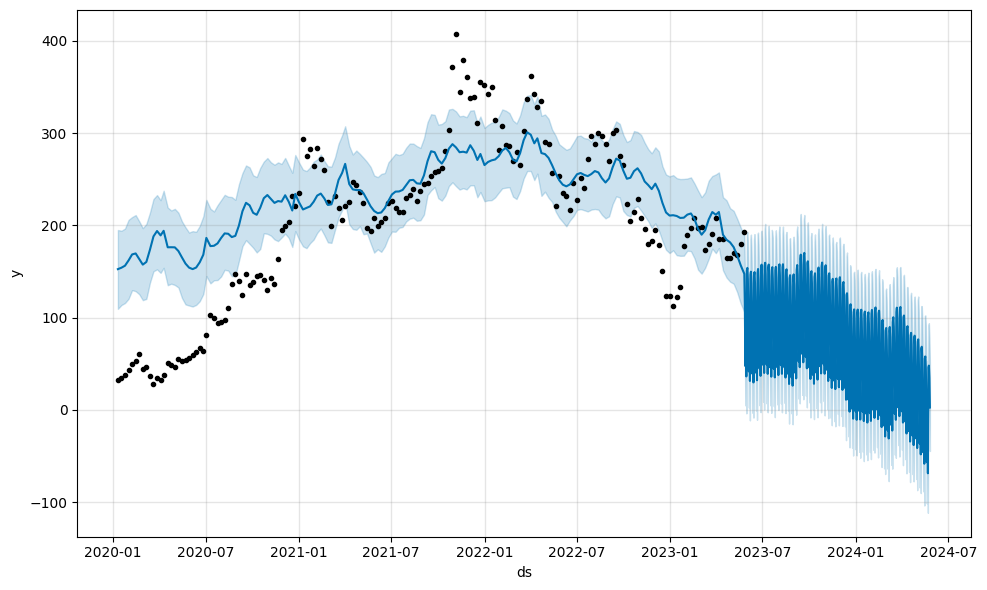

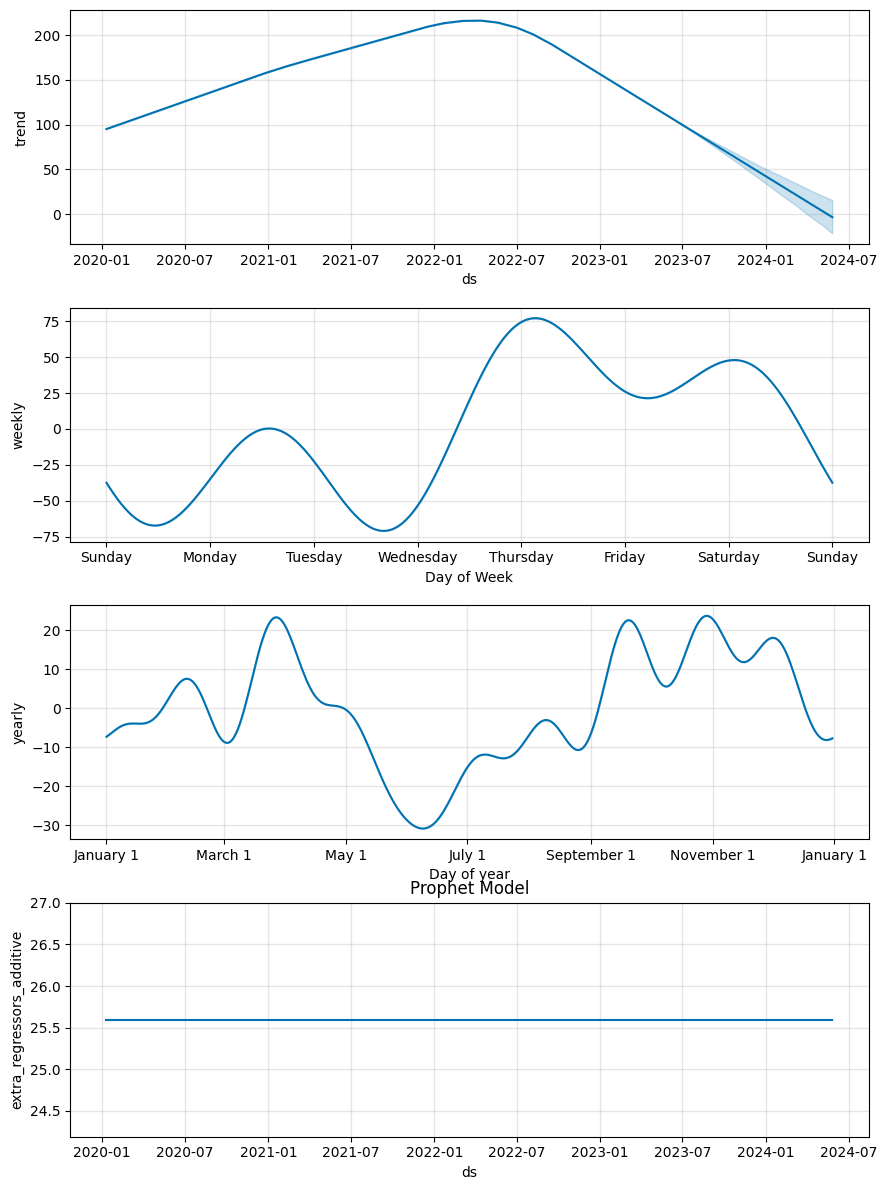

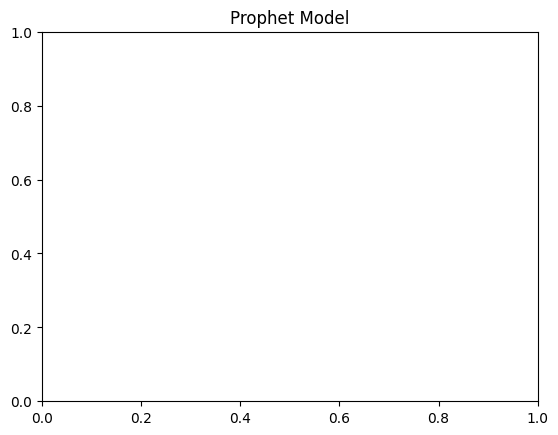

Mean Squared Error: 4108.0391426423175


In [ ]:
import pandas as pd
from prophet import Prophet

# Read the data from CSV files
df = pd.read_csv("/content/drive/MyDrive/CS145 Tesla Project/FullData.csv")
sentiment = pd.read_csv("/content/drive/MyDrive/CS145 Tesla Project/news.csv")

# Merge the sentiment data into the main DataFrame
df['sentiment'] = sentiment['sentiment']

# Drop the 'Tesla (Y_I)' column
df = df.drop('Tesla (Y_I)', axis=1)

# Interpolate missing values using linear interpolation
df = df.interpolate()

# Convert 'Week' column to datetime and rename columns to match Prophet's requirement
df['Week'] = pd.to_datetime(df['Week'])
df = df.rename(columns={'Week': 'ds', 'Raw Stock': 'y'})

# Create a Prophet model and fit it to the data
model = Prophet()
model.add_regressor('Car Index Change')
model.add_regressor('VIX change')
model.add_regressor('Google Trends')
model.add_regressor('S&P')
model.add_regressor('sentiment')
model.fit(df)


# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days

# Add the reference predictors to the future dates
future_dates['Car Index Change'] = df['Car Index Change'].values[-1]
future_dates['VIX change'] = df['VIX change'].values[-1]
future_dates['Google Trends'] = df['Google Trends'].values[-1]
future_dates['S&P'] = df['S&P'].values[-1]
future_dates['sentiment'] = df['sentiment'].values[-1]

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)
plt.title("Prophet Model")
plt.show()

from sklearn.metrics import mean_squared_error

# Extract actual values and forecasted values
actual_values = df['y'].values
forecasted_values = forecast['yhat'].values[:-365]  # Exclude the future dates from the forecast

plt.title("Prophet Model")
plt.show()
# Calculate the mean squared error
mse = mean_squared_error(actual_values, forecasted_values)
print("Mean Squared Error:", mse)


# LSTM

Fateh Implementation:

In [ ]:
#here we scale the data


from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn. preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#############

data_path= "https://raw.githubusercontent.com/fatehss/Tesla-Price-Prediction/main/data/FullData.csv?token=GHSAT0AAAAAACCKCPYQVWBS5BVHHBUEQK6MZEC3U7A" # <- data.csv
news_data_path = "https://raw.githubusercontent.com/fatehss/Tesla-Price-Prediction/main/data/news.csv?token=GHSAT0AAAAAACCKCPYRB442EF6CF44UT7ZSZEC3UXA" # <- news.csv

#for local files:
#data_path = "/content/FullData.csv"
#news_data_path = "/content/news.csv"

df = pd.read_csv(data_path)
sentiment = pd.read_csv(news_data_path)
df.insert(len(df.columns)-1, "sentiment", sentiment["sentiment"])
df  = df.drop('Tesla (Y_I)', axis=1)
dates = df["Week"]
df = df.drop('Week', axis=1)

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(df)

for i in range(len(scaled_data)):
  scaled_data[i] = np.array(scaled_data[i].astype(np.double))

print(scaled_data[-5:])





[[0.34167379 0.19067359 0.45       0.7429528  0.4048395  0.35847015]
 [0.38931111 0.27600432 0.425      0.7575632  0.43161856 0.37364726]
 [0.34116072 0.21926882 0.525      0.74406198 0.36547122 0.3681571 ]
 [0.40091896 0.21719251 0.5        0.73911736 0.35066206 0.40025339]
 [0.3815809  0.2636195  0.45       0.76670486        nan 0.43464604]]


In [ ]:
#sentiment

In [ ]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()

    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg


In [ ]:
values = df.values

values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 3, 1)
# drop columns we don't want to predict
print(reframed.head())

   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.314105   0.164737      0.250   0.390219   0.316048   0.008922   
4   0.383145   0.203560      0.275   0.416332   0.517706   0.014596   
5   0.299937   0.341533      0.375   0.402457   0.658646   0.024151   
6   0.268320   0.393662      0.850   0.374036   0.560069   0.039249   
7   0.342168   0.121759      0.375   0.415555   0.593164   0.056406   

   var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  ...  var3(t-1)  var4(t-1)  \
3   0.383145   0.203560      0.275   0.416332  ...      0.375   0.402457   
4   0.299937   0.341533      0.375   0.402457  ...      0.850   0.374036   
5   0.268320   0.393662      0.850   0.374036  ...      0.375   0.415555   
6   0.342168   0.121759      0.375   0.415555  ...      0.400   0.436866   
7   0.388987   0.158083      0.400   0.436866  ...      0.425   0.419635   

   var5(t-1)  var6(t-1)   var1(t)   var2(t)  var3(t)   var4(t)   var5(t)  \
3   0.658646   0.024151  0.268320  0.393

In [ ]:
# split into train and test sets
values = reframed.values
n_train = int(len(values)*0.8)
train = values[:n_train, :]
test = values[n_train:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(138, 1, 23) (138,) (35, 1, 23) (35,)


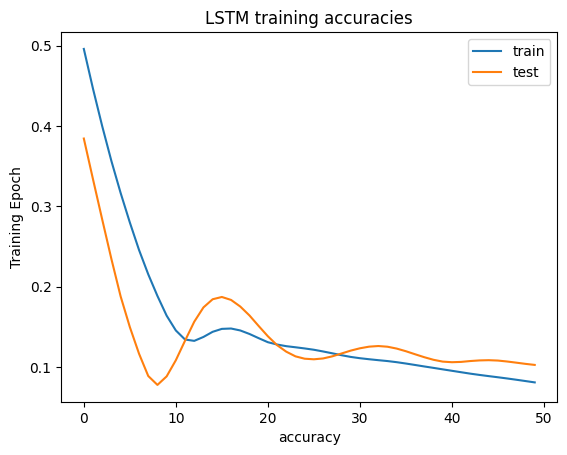

In [ ]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose = 0, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("accuracy")
plt.ylabel("Training Epoch")
plt.title("LSTM training accuracies")
plt.legend()
plt.show()

In [ ]:
print(type(dates))
dates = dates.str.split().str[0]

<class 'pandas.core.series.Series'>


2/2 [==============================] - 0s 5ms/step


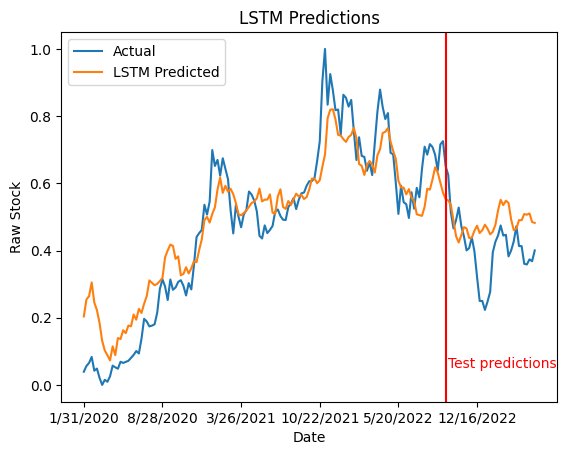

In [ ]:
xvals = dates[3:-1]
yvals = np.concatenate((train_y, test_y))

predictions = np.concatenate((model.predict(train_X), model.predict(test_X)))

plt.plot(xvals, yvals, label='Actual')
plt.plot(xvals, predictions, label='LSTM Predicted')
plt.xlabel('Date')
x_ticks = np.arange(0, len(xvals), 30)  # Generate tick mark positions from 0 to 10 with a spacing of 2

# Set the x-axis tick marks
plt.xticks(x_ticks)
plt.ylabel('Raw Stock')


x_point = int(len(values)*0.8)

# Add the vertical line
plt.axvline(x=x_point, color='red')

# Add a label to the vertical line
plt.text(x_point + 1, plt.ylim()[1] - 1, 'Test predictions', color='red')



plt.legend()

plt.title('LSTM Predictions')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(train_y, model.predict(train_X))
mse_test = mean_squared_error(test_y, model.predict(test_X))

print(f"Train MSE: {mse_train}\nTest MSE: {mse_test}")

2/2 [==============================] - 0s 6ms/step
Train MSE: 0.008878087624907494
Test MSE: 0.013013267889618874


Shanie Implementation

(141, 1, 4)
2/2 [==============================] - 0s 7ms/step
Train MSE: 14832.899112436458
Test MSE: 10499.550632725204


ValueError: ignored

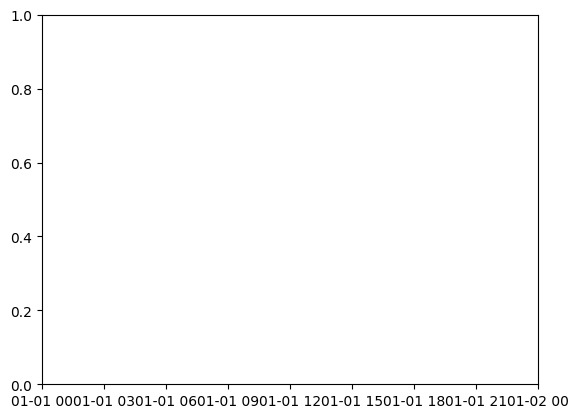

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn. preprocessing import MinMaxScaler

# Normalize the data
scaled_features = (features - features.mean()) / features.std()
scaled_target = (target - target.mean()) / target.std()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))





# Build an LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(loss='mse', optimizer='adam')

# Fit the model to the training data
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Generate predictions on the training data
rnn_predictions_train = rnn_model.predict(X_train)
rnn_predictions_train = rnn_predictions_train.reshape(-1)

# Generate predictions on the test data
rnn_predictions_test = rnn_model.predict(X_test)
rnn_predictions_test = rnn_predictions_test.reshape(-1)

# Rescale the predictions to the original scale
rnn_predictions_train = rnn_predictions_train * target.std() + target.mean()
rnn_predictions_test = rnn_predictions_test * target.std() + target.mean()

# Calculate the mean squared error for training and test sets
mse_train = mean_squared_error(target[:-len(y_test)], rnn_predictions_train)
mse_test = mean_squared_error(target[-len(y_test):], rnn_predictions_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

# Plot the actual vs predicted values for the test set
plt.plot(df.index[:-len(y_test)], target[:-len(y_test)], label='Actual')
plt.plot(df.index[:-len(y_test)], rnn_predictions_train, label='RNN Predicted (Train)')
plt.plot(df.index[-len(y_test):], target[-len(y_test):], label='Actual (Test)')
plt.plot(df.index[-len(y_test):], rnn_predictions_test, label='RNN Predicted (Test)')
plt.xlabel('Date')
plt.ylabel('Raw Stock')
plt.legend()
plt.title('RNN Predictions')
plt.show()


In [ ]:
X_train.head()

,Car Index Change,VIX change,Google Trends,S&P
Week,,,,
2023-01-06 16:00:00,0.076807,-0.024919,49,3839.50
2022-08-19 16:00:00,0.004597,0.054788,45,4280.15
2021-11-26 13:00:00,-0.039846,0.597990,40,4697.96
2023-01-20 16:00:00,-0.031989,0.081744,49,3999.09
2020-10-02 16:00:00,-0.001601,0.047384,34,3348.44


# Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae_j5ax/ag3sit4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnae_j5ax/xxovcqw5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21470', 'data', 'file=/tmp/tmpnae_j5ax/ag3sit4g.json', 'init=/tmp/tmpnae_j5ax/xxovcqw5.json', 'output', 'file=/tmp/tmpnae_j5ax/prophet_model3ri58bf7/prophet_model-20230607193236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error: 4108.0391426423175


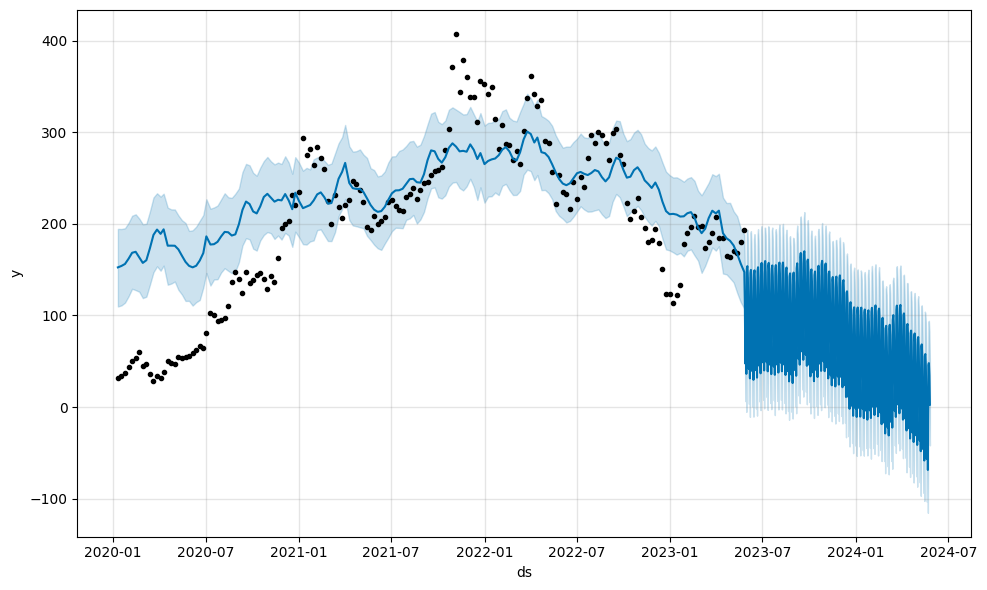

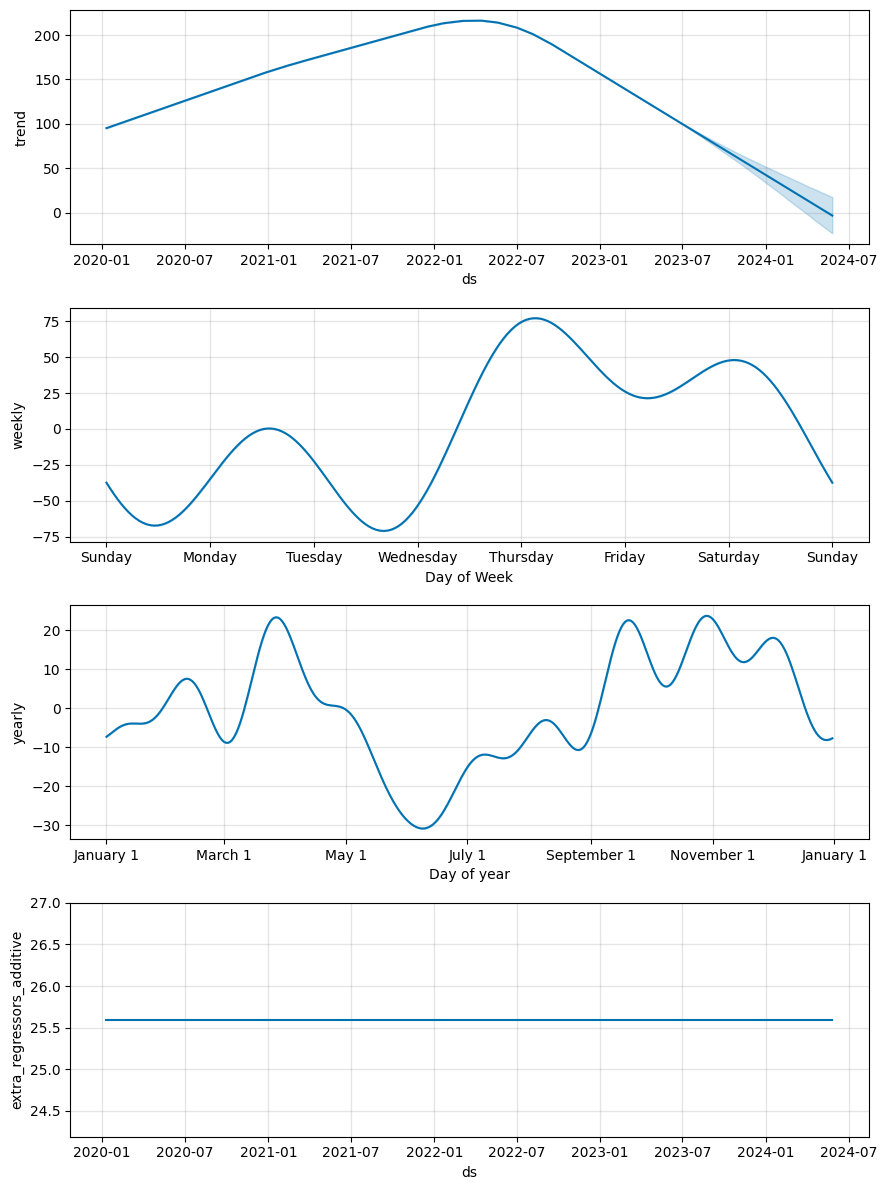

In [ ]:
import pandas as pd
from prophet import Prophet

# Read the data from CSV files
df = pd.read_csv("/content/FullData.csv")
sentiment = pd.read_csv("/content/news.csv")

# Merge the sentiment data into the main DataFrame
df['sentiment'] = sentiment['sentiment']

# Drop the 'Tesla (Y_I)' column
df = df.drop('Tesla (Y_I)', axis=1)

# Interpolate missing values using linear interpolation
df = df.interpolate()

# Convert 'Week' column to datetime and rename columns to match Prophet's requirement
df['Week'] = pd.to_datetime(df['Week'])
df = df.rename(columns={'Week': 'ds', 'Raw Stock': 'y'})

# Create a Prophet model and fit it to the data
model = Prophet()
model.add_regressor('Car Index Change')
model.add_regressor('VIX change')
model.add_regressor('Google Trends')
model.add_regressor('S&P')
model.add_regressor('sentiment')
model.fit(df)

# Generate future dates for forecasting
future_dates = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days

# Add the reference predictors to the future dates
future_dates['Car Index Change'] = df['Car Index Change'].values[-1]
future_dates['VIX change'] = df['VIX change'].values[-1]
future_dates['Google Trends'] = df['Google Trends'].values[-1]
future_dates['S&P'] = df['S&P'].values[-1]
future_dates['sentiment'] = df['sentiment'].values[-1]

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
model.plot(forecast)
model.plot_components(forecast)


from sklearn.metrics import mean_squared_error

# Extract actual values and forecasted values
actual_values = df['y'].values
forecasted_values = forecast['yhat'].values[:-365]  # Exclude the future dates from the forecast

# Calculate the mean squared error
mse = mean_squared_error(actual_values, forecasted_values)
print("Mean Squared Error:", mse)


# Results

Prophet: Mean Squared Error: 4108.0391426423175

LSTM: Train MSE: 14855.375256994907,
      Test MSE: 10367.423078894848

XGBoost: Mean Squared Error: 1452.1910361429466

Random Forest with Cross Validation: 9778.786692639156

Random Forest: Mean Squared Error: 1452.1910361429466

Based on the provided results, it appears that XGBoost and Random Forest models have lower MSE values compared to Prophet and LSTM.

# LSTM Model


Here we aim to use a LSTM model to predict the price trend of the stock using sequences of lags from the previous data

### Data Cleaning

In [ ]:
#import libraries

import numpy as np
import pandas as pd

In [ ]:
#import the data
df = pd.read_csv("https://github.com/fatehss/Tesla-Price-Prediction/blob/main/FullData.csv")


HTTPError: ignored